<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
boston_df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

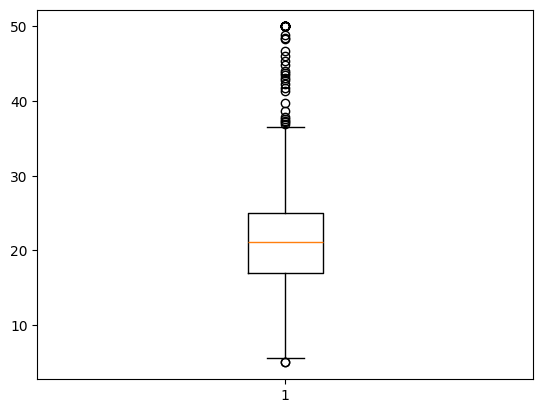

In [8]:
plt.boxplot(x='MEDV', data=boston_df)
plt.show()

### QUESTION 3: Is there a significant difference in the median value of houses bounded by the Charles river or not?

Null Hypothesis - There is NO difference in median house values between the two groups i.e houses bounded by the Charles River and not.

In [20]:
boston_df.groupby('CHAS').agg({'MEDV':['median', 'count', 'mean']}).reset_index()

CHAS   MEDV                 
       median count       mean
0  0.0   20.9   471  22.093843
1  1.0   23.3    35  28.440000

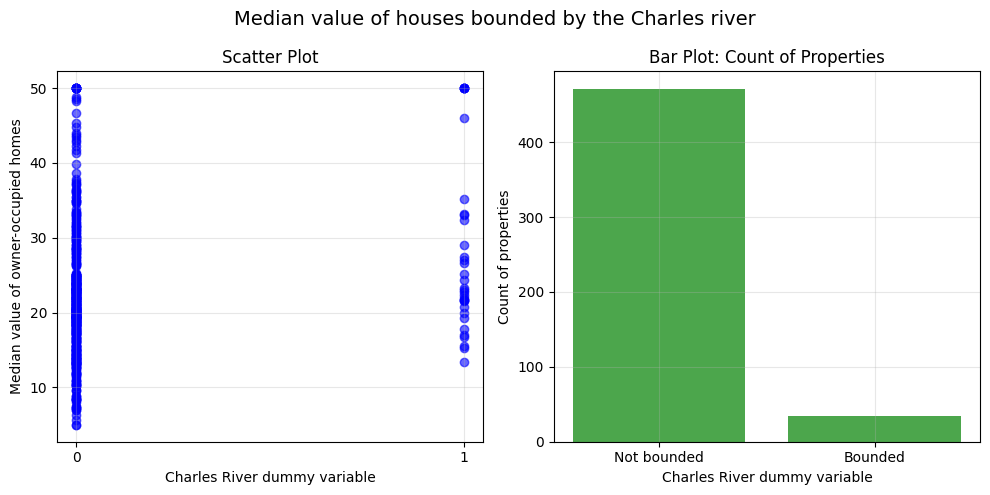

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Set main title for the entire figure
fig.suptitle('Median value of houses bounded by the Charles river', fontsize=14)

# Subplot 1: Scatter plot
ax1.scatter(boston_df['CHAS'], boston_df['MEDV'], color='blue', marker='o', alpha=0.6)
ax1.set_title('Scatter Plot')
ax1.set_xlabel('Charles River dummy variable')
ax1.set_ylabel('Median value of owner-occupied homes')
ax1.set_xticks([0.0, 1.0]) 
ax1.grid(True, alpha=0.3)

# Subplot 2: Bar plot (count of properties by CHAS value)
chas_counts = boston_df['CHAS'].value_counts().sort_index()
ax2.bar(chas_counts.index, chas_counts.values, color='green', alpha=0.7)
ax2.set_title('Bar Plot: Count of Properties')
ax2.set_xlabel('Charles River dummy variable')
ax2.set_ylabel('Count of properties')
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Not bounded', 'Bounded'])
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
statistic, pvalue = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

In [47]:
if pvalue < 0.05:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.


### ANSWER: There is a statistically significant difference in median house values between properties bounded by the Charles River and those that are not.

-------------------------------------------------------------

### QUESTION 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Null Hypothesis: All age groups have equal mean MEDV values

In [32]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

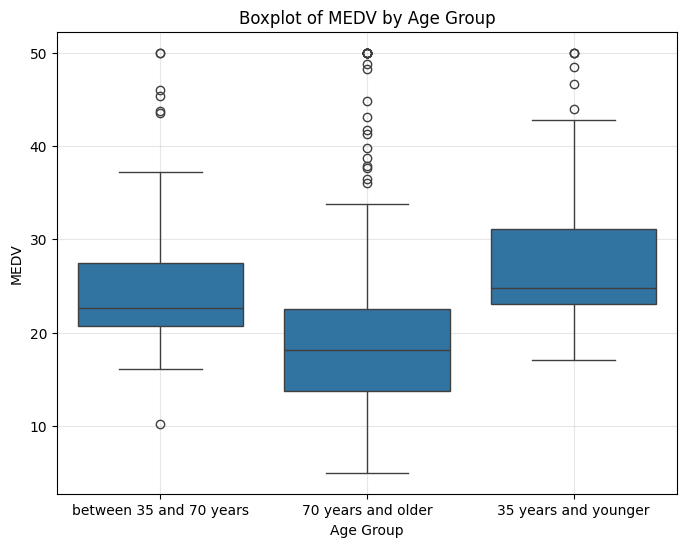

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV by Age Group')
plt.xlabel('Age Group')
plt.ylabel('MEDV')
plt.grid(True, alpha=0.3)
plt.show()

In [50]:
group_35_younger = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
group_35_70 = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
group_70_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [52]:
statistic, pvalue = scipy.stats.f_oneway(group_35_younger, group_35_70, group_70_older)

In [53]:
if pvalue < 0.05:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.


### ANSWER: There is a statistically significant difference in median house values between the different age groups of housing stock.

--------------------------------------------------------

### QUESTION 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null Hypothesis: Nitric oxide concentrations and proportion of non-retail business acres per town are independent of each other

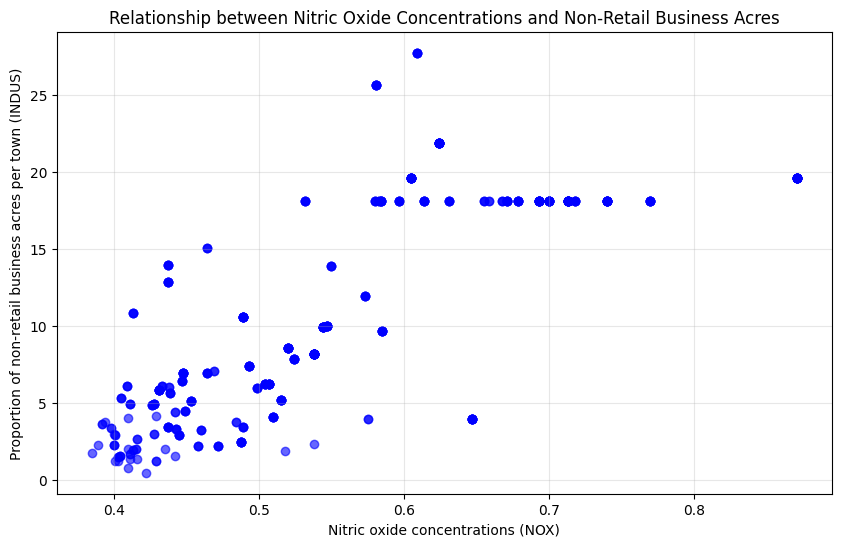

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(boston_df['NOX'], boston_df['INDUS'], color='blue', marker='o', alpha=0.6)
plt.title('Relationship between Nitric Oxide Concentrations and Non-Retail Business Acres')
plt.xlabel('Nitric oxide concentrations (NOX)')
plt.ylabel('Proportion of non-retail business acres per town (INDUS)')
plt.grid(True, alpha=0.3)
plt.show()

In [58]:
corr_coef, pvalue = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

In [59]:
if pvalue < 0.05:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.


In [60]:
pvalue

np.float64(7.913361061241532e-98)

### ANSWER: There is a clear relationship between nitric oxide concentrations and proportion of non-retail business acres per town, showcasing the proportion increases gradually with the increase in concentration.

-------------------------------------------

### QUESTION 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Null Hypothesis: The weighted distance to employment centers has NO effect on the median value of owner-occupied homes.

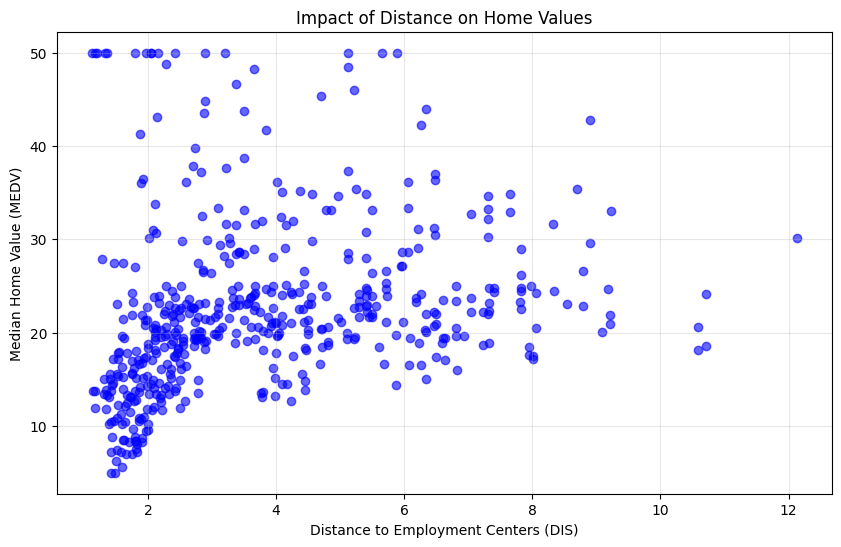

In [64]:
plt.figure(figsize=(10, 6))

# Create scatter plot
plt.scatter(boston_df['DIS'], boston_df['MEDV'], alpha=0.6, color='blue')
plt.xlabel('Distance to Employment Centers (DIS)')
plt.ylabel('Median Home Value (MEDV)')
plt.title('Impact of Distance on Home Values')
plt.grid(True, alpha=0.3)

plt.show()

In [71]:
slope, intercept, rvalue, pvalue, std_err = scipy.stats.linregress(boston_df['DIS'], boston_df['MEDV'])

print(f"Slope (coefficient): {slope:.4f}")
print(f"P-value: {pvalue}")

Slope (coefficient): 1.0916
P-value: 1.2066117273371044e-08


In [72]:
if pvalue < 0.05:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.


### ANSWER: There is a clear relationship between the weighted distance to employment centers and the median value of owner-occupied homes, which is, For each additional unit of distance to employment centers, the home value increases by $1.09

------------------------------------